<a href="https://colab.research.google.com/github/jtj7387/AI_2020_spring/blob/master/05_SVM_simple(%EC%8B%B8%EC%9D%B4%ED%82%B7%EB%9F%B0_%EC%9D%B4%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tpts = np.array([[1, 2], [1, 5], [2, 2], [3, 3.5], [7, 5], [9, 4], [8, 2],[4,8]])  # 데이터 갯수와 labels의 갯수는 같아야 한다. 그래야 그림으로 표현할수 있으니
labels = [1, 1, 1, 1, 0, 0, 0,1]

In [3]:
tpts

array([[1. , 2. ],
       [1. , 5. ],
       [2. , 2. ],
       [3. , 3.5],
       [7. , 5. ],
       [9. , 4. ],
       [8. , 2. ],
       [4. , 8. ]])

In [4]:
tpts.shape


(8, 2)

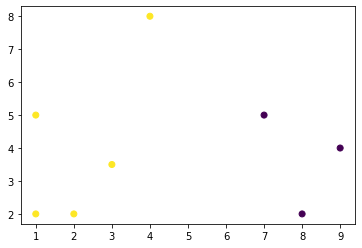

In [5]:
plt.scatter(tpts[:, 0], tpts[:, 1], c=labels)  # x차원, y차원을 표현 // labels은 위에서 알 수있듯이 1과0으로 되어있다. 그래서 두 가지 색으로 표현가능

In [6]:
clf = SVC(kernel='linear') # 벡터 공간으로 맵핑하는 함수를 커널(kernel)이라 한다. 즉 이 맵핑 함수를 선으로 표현한다는 의미/ clf=classifier(영역구분자)

In [7]:
%%time
labels=[1,1,1,1,0,0,0,1]
clf.fit(tpts, labels) # fit이란 훈련데이터에서 모델 파라미터를 학습하는 함수, kmeans에는 labels이 없어서 fit만함 그러나 이건 supervised learning 이기 
# 때문에 labels이 있다.

CPU times: user 1.27 ms, sys: 55 µs, total: 1.32 ms
Wall time: 1.12 ms


테스트해보기


In [8]:
pred1 = clf.predict([[3, 3]]) # 3,3이 어디에 어떤 영역인지 보여준다.
print(pred1[0]) # 노란색점은 1 보라색점은 0

1


In [9]:
pred1 = clf.predict([[4, 4]])
print(pred1[0]) # pred1 배열의 첫번째 요소만 끄내보기

1


In [10]:
pred1 = clf.predict([[6,6]])
print(pred1[0])

0


구분선과 같이 그림 그려보기

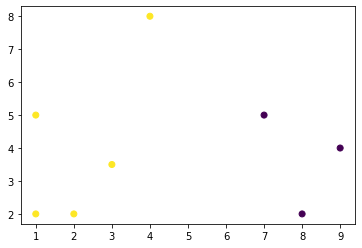

In [11]:
plt.scatter(tpts[:, 0], tpts[:, 1], c=labels)

In [12]:
clf.coef_ # 추정된 모수 확인(상수항 제외). 모수란 조사의 대상이 되는 집단 단체 -> 모집단 // 이 모집단의 특성을 나타내는 수치를 모수라 한다. 여기서는 기울기
          

array([[-0.54527198,  0.12117155]])

In [13]:
clf.intercept_ # 추정된 모수 확인(상수항 포함) // y=ax+b에서 b에 해당되는 부분을 보여주는 코드

array([2.21149237])

In [14]:
def getXY(clf):
  w = clf.coef_[0] # 기울기에 해당
  i = clf.intercept_[0] # y절편에 해당
  print('weights = ', w)
  print('intercept_ = ', i)

  a= -w[0]/w[1] #정확히 왜 이렇게 표현하는지 모름
  b= -i/w[1] #정확히 왜 이렇게 표현하는지 모름
  x=np.linspace(1,9) # x축을 1부터 9까지 촘촘히 정의


  y=a*x+b

  return x,y

In [15]:
x,y= getXY(clf)

weights =  [-0.54527198  0.12117155]
intercept_ =  2.211492367181768


In [16]:
x # x출력 시 1~9까지 매우 촘촘한 간격을 가지고 나타난다.

array([1.        , 1.16326531, 1.32653061, 1.48979592, 1.65306122,
       1.81632653, 1.97959184, 2.14285714, 2.30612245, 2.46938776,
       2.63265306, 2.79591837, 2.95918367, 3.12244898, 3.28571429,
       3.44897959, 3.6122449 , 3.7755102 , 3.93877551, 4.10204082,
       4.26530612, 4.42857143, 4.59183673, 4.75510204, 4.91836735,
       5.08163265, 5.24489796, 5.40816327, 5.57142857, 5.73469388,
       5.89795918, 6.06122449, 6.2244898 , 6.3877551 , 6.55102041,
       6.71428571, 6.87755102, 7.04081633, 7.20408163, 7.36734694,
       7.53061224, 7.69387755, 7.85714286, 8.02040816, 8.18367347,
       8.34693878, 8.51020408, 8.67346939, 8.83673469, 9.        ])

In [17]:
y # x값에 따른 y값

array([-13.75092075, -13.01622688, -12.281533  , -11.54683912,
       -10.81214524, -10.07745137,  -9.34275749,  -8.60806361,
        -7.87336973,  -7.13867586,  -6.40398198,  -5.6692881 ,
        -4.93459422,  -4.19990035,  -3.46520647,  -2.73051259,
        -1.99581871,  -1.26112484,  -0.52643096,   0.20826292,
         0.9429568 ,   1.67765067,   2.41234455,   3.14703843,
         3.88173231,   4.61642618,   5.35112006,   6.08581394,
         6.82050782,   7.55520169,   8.28989557,   9.02458945,
         9.75928333,  10.4939772 ,  11.22867108,  11.96336496,
        12.69805884,  13.43275271,  14.16744659,  14.90214047,
        15.63683435,  16.37152822,  17.1062221 ,  17.84091598,
        18.57560986,  19.31030374,  20.04499761,  20.77969149,
        21.51438537,  22.24907925])

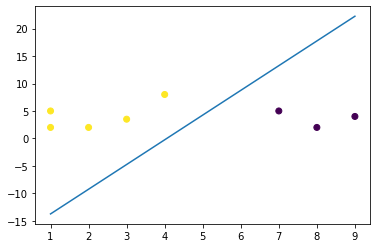

In [18]:
plt.scatter(tpts[:, 0], tpts[:, 1], c=labels) #임의로 데이터를 추가하게 되면 decision boundary가 반복학습을 통해 바뀌게 된다.
plt.plot(x,y,'-')